## DBSCAN: Define clusters como regiones continuas de alta densidad.

#### Funcionamiento: 

1. Para cada instancia, el algorimo cuenta cuantas instancias se localizan dentro de una pequeña distancia ε (epsilon) de ellas. A esta región se llama ε-neighborhood.

2. Si una instancia tiene al menos "min_samples" instancias en su ε-neighborhood (incluyéndola a sí misma), entonces es considara una instancia central (core instance).

3. Todas las instancias en el ε-neighborhood  de una instancia central comparten el mismo cluster. El ε-neighborhood puede contener a otras instancias centrales. Una gran secuencia de instancias centrales forman un único cluster.

4. Cualquier instancia que no forma parte de ninguna instancia central es considerada una anomalía.


#### Nota: Kmeans funciona a partir de centroides y distancias

![image](dbscan_clustering_using_two_different_neighborhood_radiuses.png)

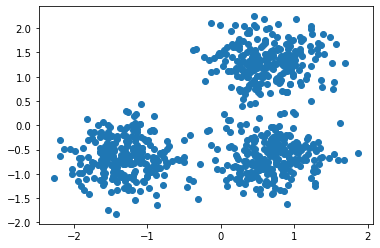

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

# Normalizamos los datos -- 
# max = 1
# min = -1 
# 0 - 1
X = StandardScaler().fit_transform(X)

plt.scatter(X[:,0], X[:,1])

In [8]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
labels

array([ 0,  1,  0,  2,  0,  1,  1,  2,  0,  0,  1,  1,  1,  2, -1,  0, -1,
        1, -1,  2,  2,  2,  2,  2,  1,  1,  2,  0,  0,  2,  0,  1,  1,  0,
        1,  0,  2,  0,  0, -1,  2,  1,  1,  1,  1,  1,  0,  2,  0,  1,  2,
        2,  1,  1,  2,  2,  1,  0,  2,  1,  2,  2,  2,  2,  2,  0,  2,  2,
        0,  0,  0,  2,  0,  0,  2,  1, -1,  1,  0,  2,  1,  1,  0,  0,  0,
       -1,  1,  2,  1,  2,  2,  0,  1,  0,  1, -1,  1,  1,  0,  0,  2,  1,
        2,  0,  2,  2,  2,  2, -1,  0, -1,  1,  1,  1,  1,  0,  0,  1,  0,
        1,  2,  1,  0,  0,  1,  2,  1,  0,  0,  2,  0,  2,  2,  2,  0, -1,
        2,  2,  0,  1,  0,  2,  0,  0,  2,  2, -1,  2,  1, -1,  2,  1,  1,
        2,  2,  2, -1,  1, -1,  1,  0,  1,  0,  2,  2, -1,  1,  2,  2,  1,
        0,  1,  2,  2,  2,  1,  1,  2,  2,  0,  1,  2,  0,  0,  2,  0,  0,
        1,  0,  1,  0,  1,  1,  2,  2,  0,  0,  1,  1,  2,  1,  2, -1,  2,
        2,  0,  2,  0,  2,  2,  0,  2,  2,  2,  0, -1,  1,  1, -1,  2,  2,
        2,  2,  1,  2,  2

In [9]:
list(db.labels_).count(-1)

40

In [10]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


# A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))

# A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))

# The V-measure is the harmonic mean between homogeneity and completeness:
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))


# The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.
# To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. 
# The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))



Estimated number of clusters: 3
Estimated number of noise points: 40
Homogeneity: 0.939
Completeness: 0.827
V-measure: 0.880
Silhouette Coefficient: 0.600


Los puntos más grandes son instancias centrales. Los pequeños de color son instancias no centrales. Los pequeños negros son anomalías.


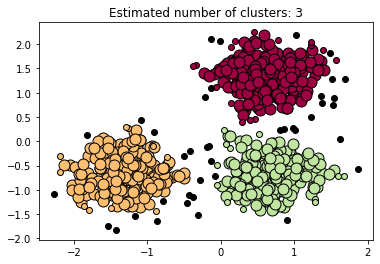

In [11]:
# #############################################################################
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
# Cada clase diferente tiene un color diferente
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=11)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

print("Los puntos más grandes son instancias centrales. Los pequeños de color son instancias no centrales. Los pequeños negros son anomalías.")
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()
